## Import Packages


In [30]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Simple Regression

In [3]:
data = '/home/cybermadness99/datasci6/datasets/CarPrice_Assignment.csv'
df = pd.read_csv(data)
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
159,160,0,toyota corolla,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788.0
12,13,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0
109,110,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0
149,150,0,subaru dl,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694.0
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df = df[['CarName', 'wheelbase','carlength', 'curbweight', 'enginesize', 'horsepower', 'highwaympg','price']]
df

,CarName,wheelbase,carlength,curbweight,enginesize,horsepower,highwaympg,price
0,alfa-romero giulia,88.6,168.8,2548,130,111,27,13495.0
1,alfa-romero stelvio,88.6,168.8,2548,130,111,27,16500.0
2,alfa-romero Quadrifoglio,94.5,171.2,2823,152,154,26,16500.0
3,audi 100 ls,99.8,176.6,2337,109,102,30,13950.0
4,audi 100ls,99.4,176.6,2824,136,115,22,17450.0
...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),109.1,188.8,2952,141,114,28,16845.0
201,volvo 144ea,109.1,188.8,3049,141,160,25,19045.0
202,volvo 244dl,109.1,188.8,3012,173,134,23,21485.0
203,volvo 246,109.1,188.8,3217,145,106,27,22470.0


In [34]:
X = sm.add_constant(df['horsepower'])  # Adds a constant term to the predictor
model = sm.OLS(df['price'], X)
results = model.fit()

residuals = results.resid
fitted = results.fittedvalues


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.48e-48
Time:                        04:20:37   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

These results indicated that the horsepower is resposible for about 65% of the variance in car prices.

### Check for assumptions

In [35]:
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.5573152996546074, p-value=0.9982612011757254


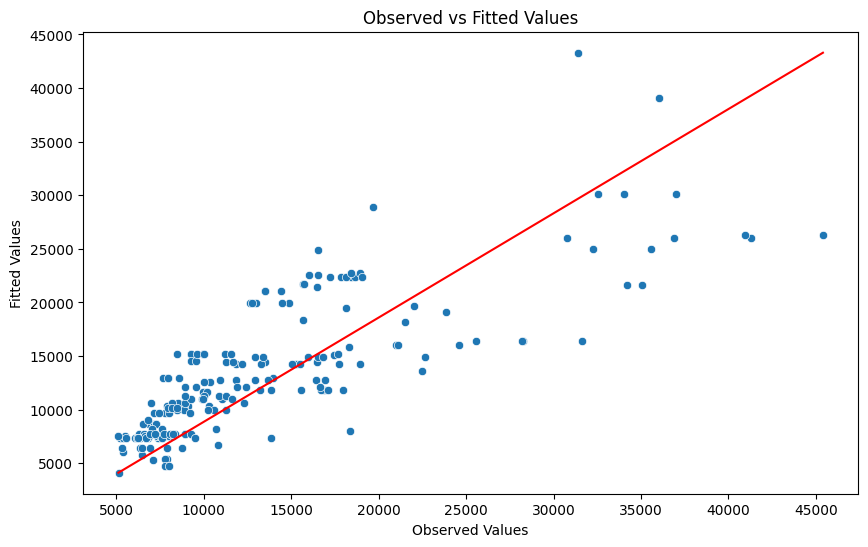

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['price']), max(df['price'])], [min(fitted), max(fitted)], color='red', linestyle='-')
plt.show()


In [39]:
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9217584729194641, p-value=5.637391886637033e-09


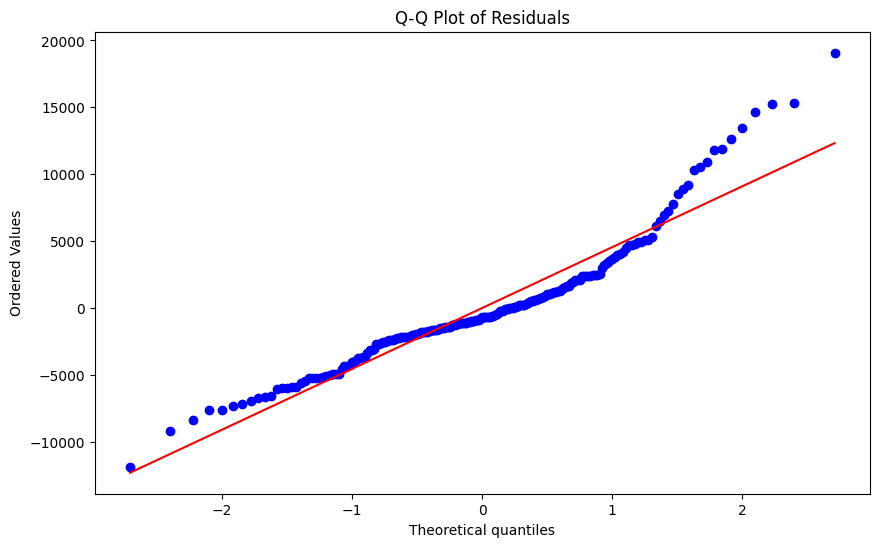

In [40]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


## Multiple Regression

In [49]:
listofpredictors5 = df[['wheelbase','carlength', 'curbweight', 'horsepower', 'highwaympg']]

X = listofpredictors5
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['price']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     142.8
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           7.81e-64
Time:                        04:31:40   Log-Likelihood:                -1976.3
No. Observations:                 205   AIC:                             3965.
Df Residuals:                     199   BIC:                             3985.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.042e+04   8250.519     -3.687      0.0

This test shows that the list of predictors can explain 78% of the variance in car prices. Of these predictors, the car length has the lease significant impact on car prices as its coeffience is -63.9

In [50]:
listofpredictors4 = df[['wheelbase', 'curbweight', 'horsepower', 'highwaympg']]

X = listofpredictors4
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['price']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     178.1
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           9.77e-65
Time:                        04:31:42   Log-Likelihood:                -1976.9
No. Observations:                 205   AIC:                             3964.
Df Residuals:                     200   BIC:                             3980.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.414e+04   7499.254     -4.552      0.0

In [51]:
listofpredictors3 = df[['wheelbase','horsepower', 'highwaympg']]

X = listofpredictors3
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['price']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.67e-60
Time:                        04:31:46   Log-Likelihood:                -1989.8
No. Observations:                 205   AIC:                             3988.
Df Residuals:                     201   BIC:                             4001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.946e+04   7314.744     -6.762      0.0

In [52]:
listofpredictors2 = df[['wheelbase','horsepower']]

X = listofpredictors2
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['price']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     304.2
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.16e-61
Time:                        04:31:59   Log-Likelihood:                -1990.1
No. Observations:                 205   AIC:                             3986.
Df Residuals:                     202   BIC:                             3996.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -4.5e+04   4707.546     -9.559      0.0

### Checking for Collinearity

In [31]:

# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
     Variable         VIF
0       const  978.544110
1   wheelbase    5.460174
2   carlength    7.664951
3  curbweight    9.263342
4  horsepower    3.909350
5  highwaympg    3.517086


The curbweight has a high VIF values. This indicates that it is highly correlated with a differnt predictor catergory. The VIF is still less than 10 so we can still include it in our analysis.